# Zomato Data Analysis Project

In [51]:
# Import Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data
df = pd.read_csv('Zomato_Data.csv')
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [55]:
df.shape

(148, 7)

In [57]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [117]:
def handleRate (rate):
    value = str(rate).split('/')
    value = value[0]
    return float(value)
    
df['rate'] = df['rate'].apply(handleRate)

In [47]:
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [65]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Types of Resturant

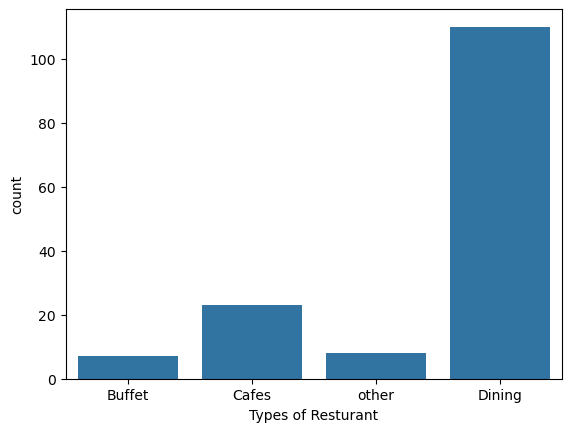

In [77]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Resturant")
plt.show()

## Conclusion - majority of the resturant falls in dinning category

Text(0, 0.5, 'Votes')

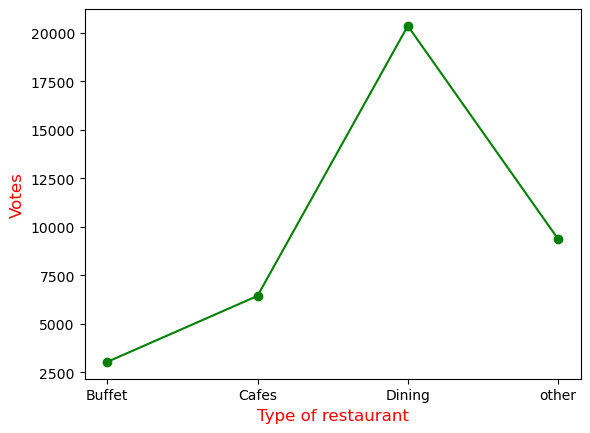

In [112]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker='o')
plt.xlabel("Type of restaurant", c="red", size=12)
plt.ylabel("Votes", c="red", size=12)

# conclusion - dinning restaurant has recieved maximum votes

In [119]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


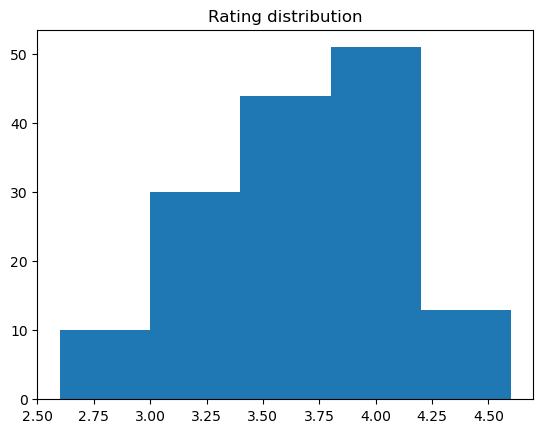

In [121]:
plt.hist(df['rate'],bins=5)
plt.title("Rating distribution")
plt.show()

# conclusion - the majority restaurantscreceived ratings from 3.5 to 4

# Avarage orders spending by couples

In [126]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

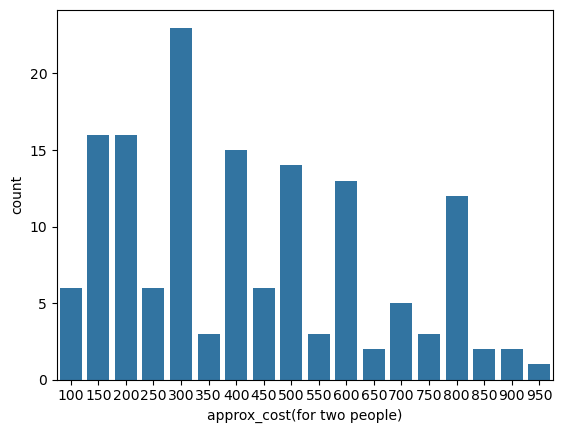

In [128]:
couple_data = df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

# conclusion - the majority of couples preffer restaurant with an approximate cost of 300 rupees

# Which mode recieve maximum ratting

<Axes: xlabel='online_order', ylabel='rate'>

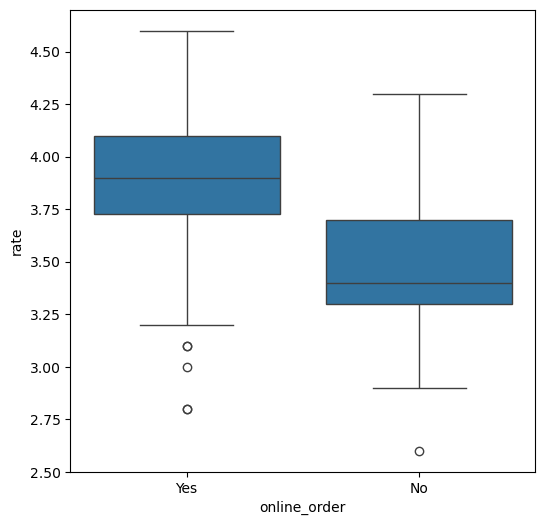

In [147]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y='rate', data = df)

# conclusion - offline orders received lower ratting in compare to online orders ratting

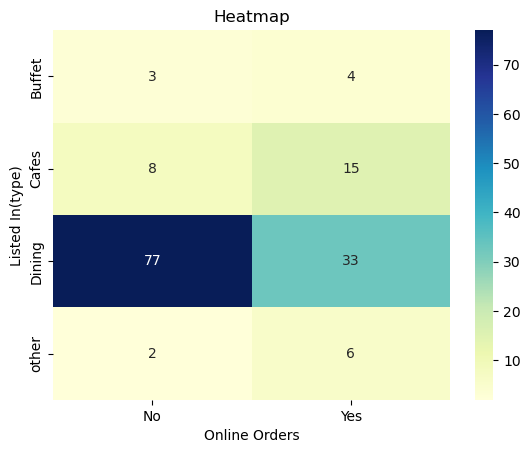

In [163]:
pivat_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivat_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Orders")
plt.ylabel("Listed In(type)")
plt.show()

# CONCLUSION : Dining restaurants primarily accept offline orders, whereas cafes primarily recieved online orders. This suggest that clients prefers orders in person at restaurants, but prefer online ordering at cafes.